# How Does a Bike-Share Navigate Speedy Success?


### Cyclistic is a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, the team wants to understand how casual riders and annual members use Cyclistic bikes differently. You need to design a new marketing strategy to convert casual riders into annual members. 


# Introduction

### This report presents a comprehensive analysis of bike rental data, focusing on different aspects such as time patterns (month, weekday), user types (Member vs. Casual), and overall usage trends. The analysis is backed by visualizations that provide clear insights into the bike rental patterns.

### For the data analysis, we have data of six months. From this data, data driven decision needs to be implemented. 

### I have already done the basic analysis of this dataset in the previous assignment. Therefore, today we will be doing advanced analytics related to this dataset.

### In the advanced analysis, I will be predicting the various variables depending upon the features of the dataset.

### We need to prepare our data, clean it and then transform it before beginning the advanced analytics.

### Let's start the process by installing the module needed for project.

In [59]:
# importing the packages required for data analysis

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics bimport accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

### Scikit-learn is a free software machine learning library for the Python programming language.

### It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. 

### We are calling Scikit-learn("sklearn") above because we will be using it later for our adavnced analytics using machine learning.

In [5]:
# Loading the datasets from January 2023 to June 2023 and giving it a relatable name.

data_2023_01 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202301-divvy-tripdata.csv')

data_2023_02 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202302-divvy-tripdata.csv')

data_2023_03 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202303-divvy-tripdata.csv')

data_2023_04 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202304-divvy-tripdata.csv')

data_2023_05 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202305-divvy-tripdata.csv')

data_2023_06 = pd.read_csv(r'C:\Users\Bisal\Desktop\Data\202306-divvy-tripdata.csv')

In [6]:
# Exploring the dataset. Head shows the first 5 rows of data.

data_2023_01.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [7]:
# Similarly, checking other datasets too

data_2023_02.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,Southport Ave & Clybourn Ave,TA1309000030,Clark St & Schiller St,TA1309000024,41.920771,-87.663712,41.907993,-87.631501,casual
1,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Lawrence Ave,TA1309000041,41.957879,-87.649584,41.969517,-87.654691,casual
2,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,Southport Ave & Clybourn Ave,TA1309000030,Aberdeen St & Monroe St,13156,41.920771,-87.663712,41.880419,-87.655519,member
3,3D561E04F739CC45,electric_bike,2023-02-26 16:12:05,2023-02-26 16:39:55,Southport Ave & Clybourn Ave,TA1309000030,Franklin St & Adams St (Temp),TA1309000008,41.920873,-87.663733,41.879434,-87.635504,member
4,0CB4B4D53B2DBE05,electric_bike,2023-02-20 11:55:23,2023-02-20 12:05:48,Prairie Ave & Garfield Blvd,TA1307000160,Cottage Grove Ave & 63rd St,KA1503000054,41.794827,-87.618795,41.780531,-87.605970,member


In [8]:
data_2023_03.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member


In [9]:
data_2023_04.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member
1,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member
2,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member
3,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member
4,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member


In [10]:
# Tail shows the last 5 rows of the dataset.

data_2023_05.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
604822,48BDA26F34445546,electric_bike,2023-05-18 10:26:43,2023-05-18 10:48:00,Clark St & Elmdale Ave,KA1504000148,NaN,NaN,41.990876,-87.669721,42.00,-87.66,member
604823,573025E5EDE10DE1,electric_bike,2023-05-17 14:32:48,2023-05-17 14:45:37,State St & 33rd St,13216,NaN,NaN,41.834734,-87.625798,41.83,-87.62,member
604824,D88D48898C6FB63E,electric_bike,2023-05-17 07:59:29,2023-05-17 08:04:54,Columbus Dr & Randolph St,13263,NaN,NaN,41.884422,-87.619393,41.88,-87.63,member
604825,4692DCD2F87497F5,electric_bike,2023-05-18 08:34:48,2023-05-18 08:38:40,Public Rack - Karlov Ave & Lawrence Ave,1127.0,NaN,NaN,41.970000,-87.730000,41.97,-87.74,member
604826,6ACB7E383473D019,electric_bike,2023-05-29 21:16:58,2023-05-29 21:24:35,State St & 33rd St,13216,NaN,NaN,41.834715,-87.625764,41.84,-87.65,member


In [11]:
data_2023_06.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
719613,D7BBF4BCBB72DA32,classic_bike,2023-06-30 12:58:56,2023-06-30 13:41:25,Fairbanks Ct & Grand Ave,TA1305000003,California Ave & Milwaukee Ave,13084,41.891847,-87.620580,41.922695,-87.697153,casual
719614,9A1685F9A39646CA,electric_bike,2023-06-29 19:56:44,2023-06-29 20:09:15,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891970,-87.620198,41.890000,-87.610000,casual
719615,CD4CC5A60881C7AF,electric_bike,2023-06-25 00:27:20,2023-06-25 00:39:09,Clark St & Lincoln Ave,13179,NaN,NaN,41.915745,-87.634604,41.920000,-87.650000,casual
719616,FF6594685CFE2056,electric_bike,2023-06-24 21:26:57,2023-06-24 21:28:44,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891725,-87.620607,41.890000,-87.620000,casual
719617,66EF9F3C318208B9,classic_bike,2023-06-24 21:30:30,2023-06-25 22:30:07,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891847,-87.620580,NaN,NaN,casual


In [12]:
# There are 13 datasets. Therefore, we need to combine these datasets to make a single dataset. 

dataset = pd.concat([ data_2023_01, data_2023_02, data_2023_03, data_2023_04, data_2023_05, data_2023_06])

In [13]:
# putting the dataset into a pandas data frame and then viewing it at the end.

df = dataset
print(df)

                 ride_id  rideable_type           started_at  \
0       F96D5A74A3E41399  electric_bike  2023-01-21 20:05:42   
1       13CB7EB698CEDB88   classic_bike  2023-01-10 15:37:36   
2       BD88A2E670661CE5  electric_bike  2023-01-02 07:51:57   
3       C90792D034FED968   classic_bike  2023-01-22 10:52:58   
4       3397017529188E8A   classic_bike  2023-01-12 13:58:01   
...                  ...            ...                  ...   
719613  D7BBF4BCBB72DA32   classic_bike  2023-06-30 12:58:56   
719614  9A1685F9A39646CA  electric_bike  2023-06-29 19:56:44   
719615  CD4CC5A60881C7AF  electric_bike  2023-06-25 00:27:20   
719616  FF6594685CFE2056  electric_bike  2023-06-24 21:26:57   
719617  66EF9F3C318208B9   classic_bike  2023-06-24 21:30:30   

                   ended_at           start_station_name start_station_id  \
0       2023-01-21 20:16:33  Lincoln Ave & Fullerton Ave     TA1309000058   
1       2023-01-10 15:46:05        Kimbark Ave & 53rd St     TA1309000037   


In [14]:
# Viewing the combined dataset to see first 10 rows.

df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.926069,-87.638858,41.930000,-87.640000,member
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799554,-87.594617,41.809835,-87.599383,member
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799587,-87.594670,41.809835,-87.599383,member
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19,2023-01-06 16:49:52,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [15]:
# Viewing the combined dataset to see last 10 rows.

df.tail(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
719608,50D571C70A6F0C04,electric_bike,2023-06-24 21:16:24,2023-06-24 22:41:04,Clinton St & Washington Blvd,WL-012,NaN,NaN,41.883562,-87.641328,41.890000,-87.630000,casual
719609,A5ACBE3821F73016,electric_bike,2023-06-25 13:29:06,2023-06-25 13:43:47,Clark St & Lincoln Ave,13179,NaN,NaN,41.915821,-87.634670,41.930000,-87.640000,casual
719610,D3694ABFD7ECDECB,electric_bike,2023-06-24 23:38:24,2023-06-25 00:23:30,Michigan Ave & 14th St,TA1307000124,NaN,NaN,41.864071,-87.623804,41.910000,-87.640000,casual
719611,04D745E887D17A4D,electric_bike,2023-06-22 21:32:47,2023-06-22 21:53:17,Ashland Ave & Wellington Ave,13269,NaN,NaN,41.936103,-87.669940,41.940000,-87.680000,casual
719612,CDA9ABCD7DA3AE4C,electric_bike,2023-06-23 06:36:30,2023-06-23 07:01:59,Clark St & Lincoln Ave,13179,NaN,NaN,41.915710,-87.634590,41.960000,-87.630000,casual
719613,D7BBF4BCBB72DA32,classic_bike,2023-06-30 12:58:56,2023-06-30 13:41:25,Fairbanks Ct & Grand Ave,TA1305000003,California Ave & Milwaukee Ave,13084,41.891847,-87.620580,41.922695,-87.697153,casual
719614,9A1685F9A39646CA,electric_bike,2023-06-29 19:56:44,2023-06-29 20:09:15,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891970,-87.620198,41.890000,-87.610000,casual
719615,CD4CC5A60881C7AF,electric_bike,2023-06-25 00:27:20,2023-06-25 00:39:09,Clark St & Lincoln Ave,13179,NaN,NaN,41.915745,-87.634604,41.920000,-87.650000,casual
719616,FF6594685CFE2056,electric_bike,2023-06-24 21:26:57,2023-06-24 21:28:44,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891725,-87.620607,41.890000,-87.620000,casual
719617,66EF9F3C318208B9,classic_bike,2023-06-24 21:30:30,2023-06-25 22:30:07,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891847,-87.620580,NaN,NaN,casual


In [16]:
# Checking the data types of the dataset using dtypes.

df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

# Time to start cleaning the dataset.

In [17]:
# Checking to see if there are any null values in the dataset.

df.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [18]:
#  There are many null columns in the dataset. We can use sum function to add null values.

df.isnull().values.sum()

1481953

In [19]:
# To see how many null values are in specific columns.

df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    357417
start_station_id      357549
end_station_name      380963
end_station_id        381104
start_lat                  0
start_lng                  0
end_lat                 2460
end_lng                 2460
member_casual              0
dtype: int64

#### These columns had NULL values, therefore I opted to remove them as my analysis did not require them. My main objective was to compare and identify trends regarding the average ride duration, day-to-day variations, and the total number of rides across the two types of membership.

In [20]:
# We can see there are null values in some of the entire column. There's no point of having it. Therefore, we need to remove it.

to_drop = ['start_station_name',
           'start_station_id',
           'end_station_name',
           'end_station_id',
           'start_lat',
           'start_lng',
           'end_lat',
           'end_lng']

df.drop(to_drop, inplace=True, axis=1)

In [21]:
# Now, after dropping those columns. Let's check our dataset again.

df.isnull().any()

ride_id          False
rideable_type    False
started_at       False
ended_at         False
member_casual    False
dtype: bool

In [22]:
# Having a peek of the dataset after removing null values.

df.head(20)

,ride_id,rideable_type,started_at,ended_at,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,member
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,member
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,member
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,member
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19,2023-01-06 16:49:52,member


In [23]:
# Having a peek of the dataset after removing null values.

df.tail(20)

,ride_id,rideable_type,started_at,ended_at,member_casual
719598,A0A0B105EA4FBDE0,electric_bike,2023-06-12 09:06:02,2023-06-12 09:23:58,member
719599,4CA5788FB7BBB534,electric_bike,2023-06-29 17:55:46,2023-06-29 18:01:15,member
719600,B986F4118F09316A,electric_bike,2023-06-09 16:16:00,2023-06-09 16:30:47,member
719601,2CF011F331FAC616,electric_bike,2023-06-12 16:48:27,2023-06-12 16:52:19,member
719602,AF036A8A8EBF731E,docked_bike,2023-06-10 11:56:08,2023-06-15 04:57:09,casual
719603,A04CE14C2195E790,electric_bike,2023-06-23 14:03:41,2023-06-23 14:07:29,member
719604,6B5529395EB391D4,electric_bike,2023-06-20 18:34:37,2023-06-20 18:48:03,casual
719605,ED79A3138259D178,electric_bike,2023-06-19 21:25:36,2023-06-19 21:29:02,casual
719606,0EE85D6F1AFC19BC,electric_bike,2023-06-20 08:52:29,2023-06-20 09:03:28,casual
719607,D1155E659D1D05EB,electric_bike,2023-06-19 22:19:51,2023-06-19 22:28:47,casual


In [24]:
# To find out if there are any duplicate data into the dataset.

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
719613    False
719614    False
719615    False
719616    False
719617    False
Length: 2390459, dtype: bool

# Let's take a deep dive into the dataset by finding stats of our dataset.

In [25]:
# Finding out unique rides in our dataset.

df.ride_id.nunique()

2390459

In [26]:
# Finding out number of bikes in our dataset.

df.rideable_type.nunique()

3

In [27]:
# Finding out how many rows and columns are there in our datset.

df.shape

(2390459, 5)

In [28]:
df.dtypes

ride_id          object
rideable_type    object
started_at       object
ended_at         object
member_casual    object
dtype: object

#### We can see that our column of started_at and ended_at has object column. We cannot use object to perform data analysis. Therefore, we need to change it to date and time to have a broader aspect of those columns.

In [29]:
# Changing object data type into date and time. 

df['started_at']= pd.to_datetime(df['started_at'],format="mixed", utc="True")

df['ended_at']= pd.to_datetime(df['ended_at'],format="mixed", utc="True")

# df['started_at'] = pd.to_datetime(tripdata['started_at'])

# df['started_at'] = df['started_at'].astype('datetime64') 

In [30]:
# checking to see if data types changed

df.dtypes

ride_id                       object
rideable_type                 object
started_at       datetime64[ns, UTC]
ended_at         datetime64[ns, UTC]
member_casual                 object
dtype: object

In [31]:
# since now data type is changed, let's find out the ride length between the rides by creating a ride length column.
# Disclaimer, ride length is time here. 

df['ride_length'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)

In [32]:
# let's check if ridelength is created or not.

df.dtypes

ride_id                       object
rideable_type                 object
started_at       datetime64[ns, UTC]
ended_at         datetime64[ns, UTC]
member_casual                 object
ride_length                  float64
dtype: object

In [33]:
# since ride length is created, we can see that its has float datatype. Let's change it to integer.

df['ride_length'] = df['ride_length'].astype('int32')

In [34]:
# checking the data type again

df.dtypes

ride_id                       object
rideable_type                 object
started_at       datetime64[ns, UTC]
ended_at         datetime64[ns, UTC]
member_casual                 object
ride_length                    int32
dtype: object

In [35]:
# Now, let's view our dataset.

df.head(50)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42+00:00,2023-01-21 20:16:33+00:00,member,10
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36+00:00,2023-01-10 15:46:05+00:00,member,8
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57+00:00,2023-01-02 08:05:11+00:00,casual,13
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58+00:00,2023-01-22 11:01:44+00:00,member,8
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01+00:00,2023-01-12 14:13:20+00:00,member,15
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03+00:00,2023-01-31 07:21:16+00:00,member,3
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36+00:00,2023-01-15 21:32:36+00:00,member,14
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01+00:00,2023-01-25 10:58:22+00:00,member,9
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47+00:00,2023-01-25 21:02:14+00:00,member,12
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19+00:00,2023-01-06 16:49:52+00:00,member,12


In [36]:
df.tail(50)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
719568,AF4ED3F726541FA5,electric_bike,2023-06-30 16:57:53+00:00,2023-06-30 17:02:31+00:00,casual,4
719569,44D2DF6BFE2C4C33,electric_bike,2023-06-29 19:57:35+00:00,2023-06-29 20:08:03+00:00,casual,10
719570,753F9EF90C9112F3,electric_bike,2023-06-30 10:56:47+00:00,2023-06-30 11:09:30+00:00,casual,12
719571,3AE5656925B9AA07,electric_bike,2023-06-27 16:12:12+00:00,2023-06-27 16:26:42+00:00,casual,14
719572,2C89E7EED45CBCA8,electric_bike,2023-06-08 09:39:39+00:00,2023-06-08 09:50:02+00:00,member,10
719573,A266C6FA4EA2D673,electric_bike,2023-06-22 16:48:38+00:00,2023-06-22 17:01:09+00:00,member,12
719574,4E559657970F721C,electric_bike,2023-06-19 06:42:07+00:00,2023-06-19 06:43:55+00:00,member,1
719575,7DCA459197809C16,electric_bike,2023-06-21 17:20:08+00:00,2023-06-21 17:31:04+00:00,member,10
719576,D9E50AEA4B3020F6,docked_bike,2023-06-22 19:36:17+00:00,2023-06-22 20:06:38+00:00,casual,30
719577,BED2B26D7D68EBE5,electric_bike,2023-06-08 14:19:38+00:00,2023-06-08 14:25:31+00:00,member,5


In [37]:
# let's sort the the "ride_length" column in Ascending order to see long and short ride length

df.sort_values(by = 'ride_length')

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
367827,8B6E5BA70093AAB7,electric_bike,2023-06-02 19:29:06+00:00,2023-06-02 18:28:51+00:00,casual,-60
367872,D12C3767DC204369,electric_bike,2023-06-02 19:29:42+00:00,2023-06-02 18:40:44+00:00,casual,-48
638607,318E29DFACCD7C24,electric_bike,2023-06-02 23:26:45+00:00,2023-06-02 23:10:38+00:00,member,-16
363359,DFC43BD5CB34ACBF,electric_bike,2023-04-06 23:09:31+00:00,2023-04-06 23:00:35+00:00,member,-8
189347,4EFC95304E050AA1,electric_bike,2023-02-04 13:08:08+00:00,2023-02-04 13:04:52+00:00,member,-3
...,...,...,...,...,...,...
533226,B15E7D0761667BE5,docked_bike,2023-05-06 11:06:04+00:00,2023-05-26 04:48:46+00:00,casual,28422
572148,D916091A93783FD5,docked_bike,2023-06-10 17:32:29+00:00,2023-06-30 14:32:42+00:00,casual,28620
6839,38A41BB0F2B8F37C,docked_bike,2023-05-05 21:53:14+00:00,2023-05-26 04:43:45+00:00,casual,29210
605743,926D6DB98C141C73,docked_bike,2023-06-10 17:32:51+00:00,2023-07-01 04:38:49+00:00,casual,29465


In [38]:
# Above, we can see ride_length is in negative length. it's because the ending time is earlier than the starting time, which 
# doesnot makes sense at all, because it cannot happen. 

# finding how many rows are there with negative value

df[df['ride_length'] < 0].count()

ride_id          6
rideable_type    6
started_at       6
ended_at         6
member_casual    6
ride_length      6
dtype: int64

In [39]:
# Let's check if there are rides less than one minute or not, because it also cannot happen realistically.

df[df['ride_length'] < 1].count()

ride_id          72904
rideable_type    72904
started_at       72904
ended_at         72904
member_casual    72904
ride_length      72904
dtype: int64

In [40]:
# It came out 72,904 rows are less than one minute. Let's remove it because it makes no sense.

df = df[df['ride_length'] >= 1]
df = df.reset_index()
df = df.drop(columns=['index'])

In [41]:
# let's check the dataset now

df

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42+00:00,2023-01-21 20:16:33+00:00,member,10
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36+00:00,2023-01-10 15:46:05+00:00,member,8
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57+00:00,2023-01-02 08:05:11+00:00,casual,13
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58+00:00,2023-01-22 11:01:44+00:00,member,8
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01+00:00,2023-01-12 14:13:20+00:00,member,15
...,...,...,...,...,...,...
2317550,D7BBF4BCBB72DA32,classic_bike,2023-06-30 12:58:56+00:00,2023-06-30 13:41:25+00:00,casual,42
2317551,9A1685F9A39646CA,electric_bike,2023-06-29 19:56:44+00:00,2023-06-29 20:09:15+00:00,casual,12
2317552,CD4CC5A60881C7AF,electric_bike,2023-06-25 00:27:20+00:00,2023-06-25 00:39:09+00:00,casual,11
2317553,FF6594685CFE2056,electric_bike,2023-06-24 21:26:57+00:00,2023-06-24 21:28:44+00:00,casual,1


<Axes: xlabel='member_casual', ylabel='ride_length'>

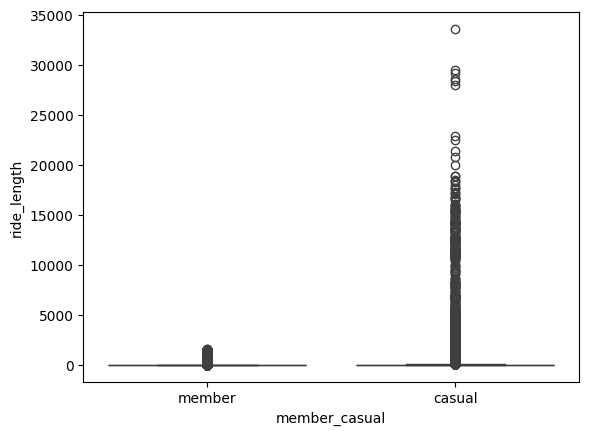

In [42]:
# Let's create a boxplot of ride length to see the data between annual member and casual Rider.

sns.boxplot(data = df, x ='member_casual', y = 'ride_length', order = ['member', 'casual'])

## We can see that casual members use bike for more duration than annual members. 

In [43]:
# Now, let's distinguish data set more by creating  year, month  and week day column.

df['year'] = df['started_at'].dt.year
df['month'] = df['started_at'].dt.month
df['weekday'] = df['started_at'].dt.weekday  # Monday=0, Sunday=6
df['hour'] = df['started_at'].dt.hour

In [44]:
# Viewing our dataset with new columns
df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,year,month,weekday,hour
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42+00:00,2023-01-21 20:16:33+00:00,member,10,2023,1,5,20
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36+00:00,2023-01-10 15:46:05+00:00,member,8,2023,1,1,15
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57+00:00,2023-01-02 08:05:11+00:00,casual,13,2023,1,0,7
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58+00:00,2023-01-22 11:01:44+00:00,member,8,2023,1,6,10
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01+00:00,2023-01-12 14:13:20+00:00,member,15,2023,1,3,13


## Let's start our advanced analytics as we have already transformed our data.

### Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain. An easy to understand example is classifying emails as “spam” or “not spam.”

### I wanted to predict the rider type (casual or member) based on certain features like month and weekdays, by using classification algorithm known as logistic regression.

### Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. We are trying same here for rider type based on month or weekday.

In [47]:
# At first we need to assign features for X and Y.

# The features (X) are the variables used to make predictions, and the target variable (y) is what you're trying to predict.

# I am considering the month and weekday as potential factors that might influence or be indicative 
# of something related to types of member.

X = df[['month', 'weekday']]
y = df['member_casual']

###  I am trying to build a model that can predict the 'member_casual' category based on the information provided by the 'month' and 'weekday' features.

In [48]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Creating and training  the logistic regression model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
# Making  predictions on the test set

y_pred = model.predict(X_test)

In [51]:
# Evaluating the model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [52]:
# Printing the results

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6530610924012591
Confusion Matrix:
 [[  8071 152590]
 [  8220 294630]]
Classification Report:
               precision    recall  f1-score   support

      casual       0.50      0.05      0.09    160661
      member       0.66      0.97      0.79    302850

    accuracy                           0.65    463511
   macro avg       0.58      0.51      0.44    463511
weighted avg       0.60      0.65      0.54    463511



### From the above result, we got Accuracy of: 0.6531 (65.31%).

### This represents that the overall accuracy of the model, which is the ratio of correctly predicted instances (both casual and member) to the total number of instances.

### In order to understand it breifly, let's make visualizations of it.

### 1. Confusion Matrix

### It is a table with two rows and two columns that reports the number of true positives, false negatives, false positives, and true negatives.

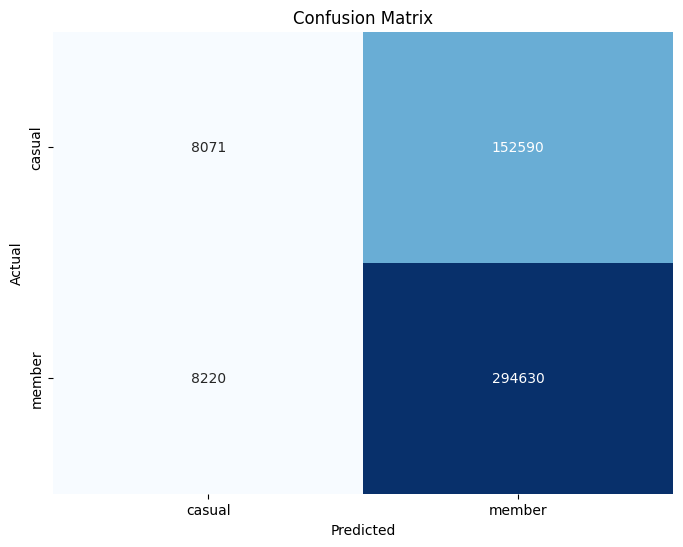

In [66]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['casual', 'member'], yticklabels=['casual', 'member'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Explanation of Confusion Matrix
### The confusion matrix provides a more detailed breakdown of correct and incorrect predictions.
### The top-left value (8071) represents the number of true negatives (TN), i.e., instances correctly predicted as 'casual.'
### The top-right value (152590) represents the number of false positives (FP), i.e., instances incorrectly predicted as 'member.'
### The bottom-left value (8220) represents the number of false negatives (FN), i.e., instances incorrectly predicted as 'casual.'
### The bottom-right value (294630) represents the number of true positives (TP), i.e., instances correctly predicted as 'member.'

### 2. Precision-Recall Curve 

### It shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

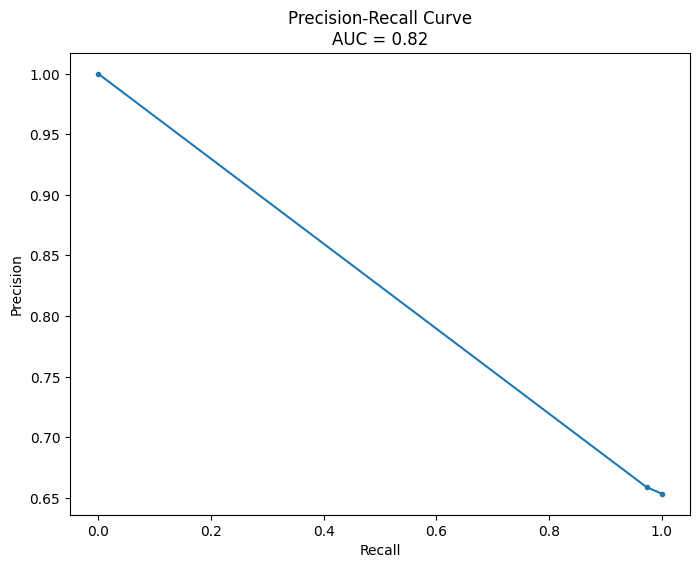

In [67]:
# precison-recall curve

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

# Assuming y_pred is the predicted labels from model as strings ('casual' and 'member')
y_pred_bin = label_binarize(y_pred, classes=['casual', 'member'])

# Convert true labels to binary (0 for 'casual', 1 for 'member')
y_test_bin = label_binarize(y_test, classes=['casual', 'member'])

# Compute Precision-Recall curve values
precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_bin.ravel())

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve\nAUC = {auc_score:.2f}')
plt.show()

### This line of code displays the area under the curve (AUC) value in the title of the Precision-Recall Curve plot. If the AUC is 0.82, as you mentioned, it indicates the model's strong performance in balancing precision and recall.

### The Precision-Recall Curve with an AUC of 0.82 demonstrates a highly effective model for distinguishing between "casual" and "member" bike riders. The curve, which reaches from perfect precision to perfect recall, showcases the model's ability to make accurate positive predictions while capturing a high percentage of actual positive instances.

### 3. Roc Curve

### This curve plays a central role in evaluating diagnostic ability of tests to discriminate the true state of subjects, finding the optimal cut off values, and comparing two alternative diagnostic tasks when each task is performed on the same subject (5-7).

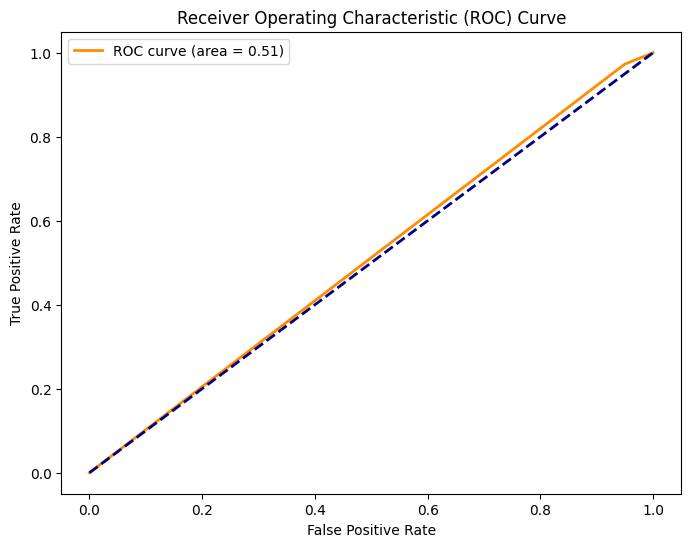

In [68]:
#ROC Curve

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### The ROC Curve visually represents a model's ability to distinguish between "casual" and "member" bike riders. The area under the curve (AUC), here 0.82, quantifies this performance. A higher AUC indicates better overall discrimination. The dark orange curve shows how well the model balances correctly identifying "members" (true positive rate) while minimizing false positives. The dashed navy line represents random guessing. The model's strong AUC suggests effective classification, critical for accurate predictions.

## Classification Report

### Precision:
#### Precision for 'casual' (0.50): Of the instances predicted as 'casual,' 50% were actually 'casual.'
#### Precision for 'member' (0.66): Of the instances predicted as 'member,' 66% were actually 'member.'r.'.'

### Recall:
#### Recall for 'casual' (0.05): Of all the actual 'casual' instances, only 5% were correctly predicted as 'casual.'
#### Recall for 'member' (0.97): Of all the actual 'member' instances, 97% were correctly predicted as 'member.'

### F1-Score:
#### F1-score is the harmonic mean of precision and recall and provides a balance between the two.
#### F1-score for 'casual' (0.09): A low F1-score indicates a trade-off between precision and recall for 'casual.'
#### F1-score for 'member' (0.79): A high F1-score indicates good balance between precision and recall for 'member.'

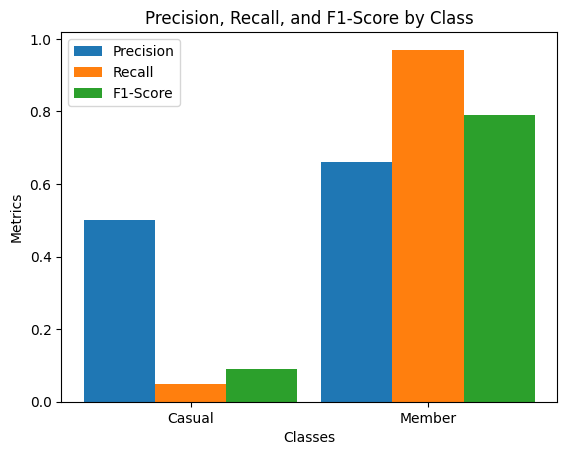

## Interpretation

### I wanted to predict the rider type (e.g., casual or member) based on certain features like weekday and month.

### The model seems to perform well in predicting 'member' instances (high precision, recall, and F1-score). However, for 'casual' instances, the model has low precision, recall, and F1-score, indicating it struggles to correctly predict 'casual' cases.

### In summary, while the model performs reasonably well for predicting 'member' cases, it needs improvement in predicting 'casual' cases. Depending on the goals and the importance of correctly predicting each class, it should be further tuned by exploring another algorithm like Random Forest, Linear Regression, K-Means Clustering, Hierarchical Clustering or any other algorithms for better output.